In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

In [3]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
train_data.shape,type(train_data)

((60000, 28, 28), numpy.ndarray)

In [5]:
train_labels.shape,type(train_labels)

((60000,), numpy.ndarray)

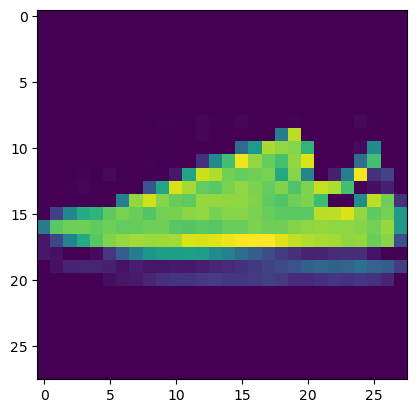

In [6]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[6])

In [7]:
# Create a small list so we can index in our training labels
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'Bag')

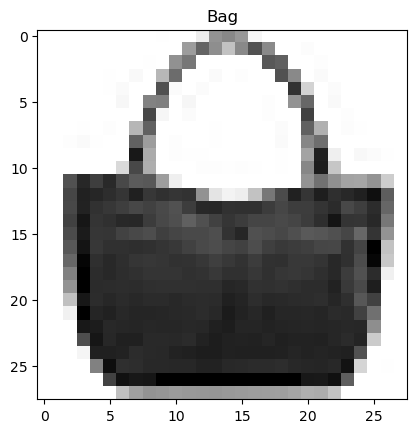

In [8]:
# plot an example image and its label
image_index = 100
plt.imshow(train_data[image_index],cmap=plt.cm.binary)
plt.title(class_names[train_labels[image_index]])

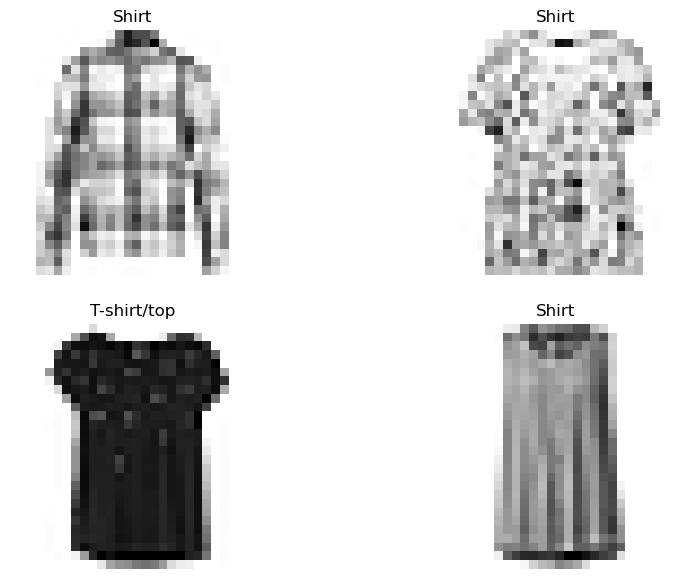

In [9]:
# plot random images
import random
plt.figure(figsize=(10,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    random_idx = random.choice(range(len(train_data)))
    plt.imshow(train_data[random_idx],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[random_idx]])
    plt.axis(False)

# Let's Build a Multiclass Classification Model

In [10]:
# set the random seed
tf.random.set_seed(42)
# create the model.
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(train_data[0].shape)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
# compile the model.
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])
# fit the model
history1 = model1.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,
                      validation_data=(test_data,tf.one_hot(test_labels,depth=10) ))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.6480 - accuracy: 0.1080 - val_loss: 2.2414 - val_accuracy: 0.1348
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2007 - accuracy: 0.1473 - val_loss: 2.1486 - val_accuracy: 0.1581
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9869 - accuracy: 0.1928 - val_loss: 1.8241 - val_accuracy: 0.1952
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7866 - accuracy: 0.2101 - val_loss: 1.7383 - val_accuracy: 0.2241
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7232 - accuracy: 0.2360 - val_loss: 1.6510 - val_accuracy: 0.2980
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6245 - accuracy: 0.3041 - val_loss: 1.5834 - val_accuracy: 0.3384
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5460 - accuracy: 0.3400 - val_loss: 1.4486 - val_accuracy:

<AxesSubplot:>

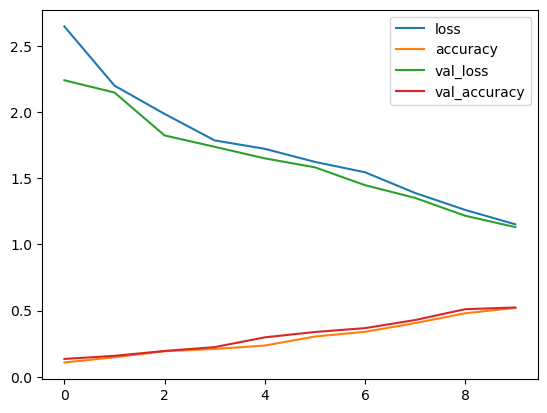

In [11]:
import pandas as pd
d = pd.DataFrame(history1.history)
d.plot()

In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


# Improve Performance via Normalization

In [13]:
# set the seed
tf.random.set_seed(42)
train_data_norm = train_data/train_data.max()
test_data_norm  = test_data/test_data.max()
# create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=train_data[0].shape),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
# compile the model.
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
# fit the model
history2 = model2.fit(train_data_norm,tf.one_hot(train_labels,depth=10),epochs=10,
                     validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7111 - accuracy: 0.7577 - val_loss: 0.5110 - val_accuracy: 0.8208
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4599 - accuracy: 0.8382 - val_loss: 0.5296 - val_accuracy: 0.8194
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4305 - accuracy: 0.8479 - val_loss: 0.4714 - val_accuracy: 0.8272
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4144 - accuracy: 0.8538 - val_loss: 0.4515 - val_accuracy: 0.8388
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4064 - accuracy: 0.8566 - val_loss: 0.4729 - val_accuracy: 0.8354
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3985 - accuracy: 0.8602 - val_loss: 0.4572 - val_accuracy: 0.8358
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3933 - accuracy: 0.8607 - val_loss: 0.4595 - val_accuracy:

<AxesSubplot:title={'center':'Non Normalized Data'}>

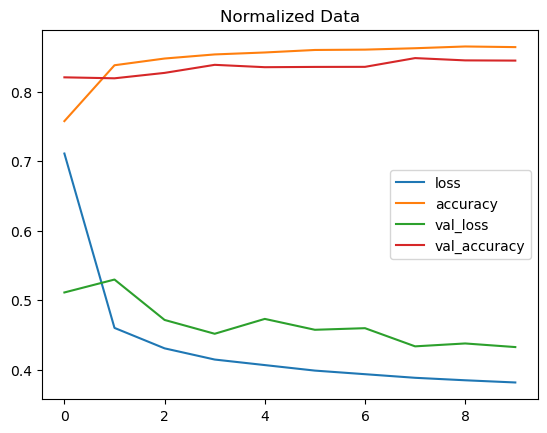

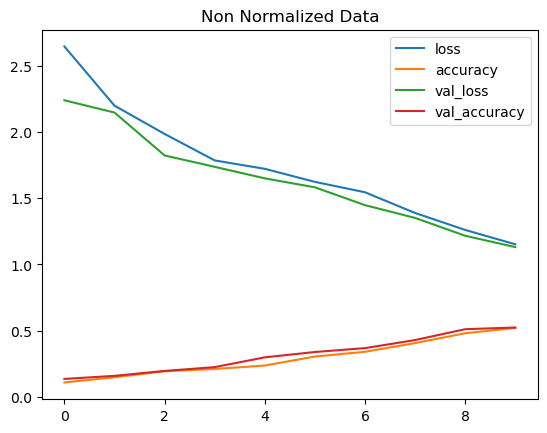

In [14]:
d2 = pd.DataFrame(history2.history)
d1 = pd.DataFrame(history1.history)
d2.plot(title='Normalized Data')
d1.plot(title='Non Normalized Data')

# Find the ideal learning rate

In [15]:
# set the seed
tf.random.set_seed(42)
# create the model
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=train_data_norm[0].shape),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
# compile the model
model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
# learning rate callback handler
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20))
# fit the model
history3 = model3.fit(train_data_norm,tf.one_hot(train_labels,depth=10),
                     epochs=30,
                     validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)),
                      callbacks=[lr_callback]
                 )

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3621 - accuracy: 0.5249 - val_loss: 0.9095 - val_accuracy: 0.7096 - lr: 1.0000e-04
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7259 - accuracy: 0.7717 - val_loss: 0.6494 - val_accuracy: 0.7912 - lr: 1.1220e-04
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5830 - accuracy: 0.8108 - val_loss: 0.5768 - val_accuracy: 0.8075 - lr: 1.2589e-04
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5261 - accuracy: 0.8253 - val_loss: 0.5336 - val_accuracy: 0.8219 - lr: 1.4125e-04
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4930 - accuracy: 0.8338 - val_loss: 0.5101 - val_accuracy: 0.8272 - lr: 1.5849e-04
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4702 - accuracy: 0.8408 - val_loss: 0.4961 - val_accuracy: 0.8290 - lr: 1.7783e-04
Epoch 7/30
1875/1875 [============

<AxesSubplot:>

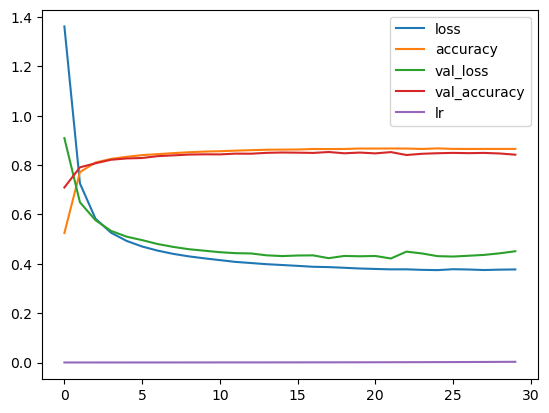

In [16]:
pd.DataFrame(history3.history).plot()

In [17]:
lrs = 1e-4 * 10**(tf.range(30)/20)

Text(0.5, 1.0, 'learning rate v/s loss')

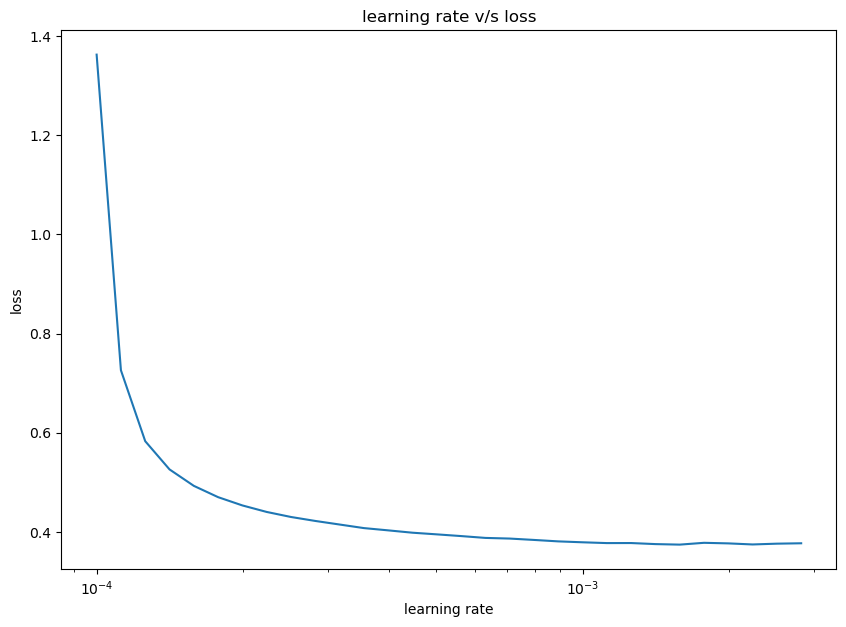

In [18]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history3.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate v/s loss')

In [19]:
# model with ideal learning rate

# set the seed
tf.random.set_seed(42)
# create the model
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=train_data[0].shape),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
# compile the model
model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.003),
              metrics=['accuracy'])
# fit the model
history4 = model4.fit(train_data_norm,train_labels,epochs=30,validation_data=(test_data_norm,test_labels))

Epoch 1/30


C:\Users\DELL\.conda\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1875/1875 [==============================] - 5s 3ms/step - loss: 0.6313 - accuracy: 0.7793 - val_loss: 0.5292 - val_accuracy: 0.8249
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4899 - accuracy: 0.8323 - val_loss: 0.5242 - val_accuracy: 0.8169
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4650 - accuracy: 0.8384 - val_loss: 0.5102 - val_accuracy: 0.8206
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4483 - accuracy: 0.8438 - val_loss: 0.5055 - val_accuracy: 0.8270
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4403 - accuracy: 0.8448 - val_loss: 0.4949 - val_accuracy: 0.8294
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4312 - accuracy: 0.8486 - val_loss: 0.4998 - val_accuracy: 0.8227
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4272 - accuracy: 0.8503 - val_loss: 0.4929 - val_accuracy: 0.8304
Epo

<AxesSubplot:>

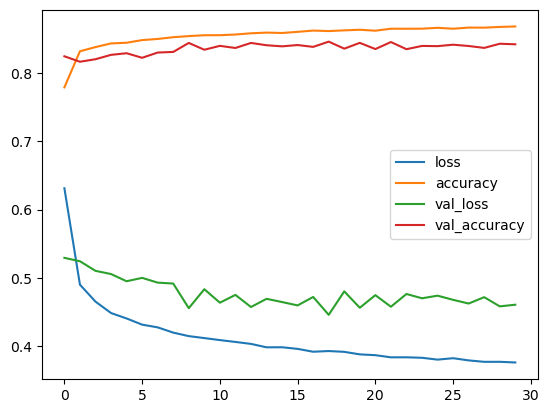

In [20]:
pd.DataFrame(history4.history).plot()

In [24]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_custom(y_true,y_pred,classes=None,figsize=(30,10)):

    # create a confusion matrix
    cm = confusion_matrix(y_true,y_pred)
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    n_classes = cm.shape[0]
    fig , ax = plt.subplots(figsize=(40,15))
    # create a matrix plot
    cax = ax.matshow(cm,cmap=plt.cm.Blues)
    fig.colorbar(cax)
    # create classes
    
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    # label the axis
    ax.set(title='Confusion Matrix',
          xlabel='Predicted Label',
          ylabel='True Label',
          xticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()


    # set the threshold
    threshold = (cm.max() + cm.min())/2
    # plot test
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",horizontalalignment="center",
                color="white" if cm[i,j] > threshold else "black",size=15)

## Evaluate multiclass classification models

313/313 [==============================] - 1s 2ms/step


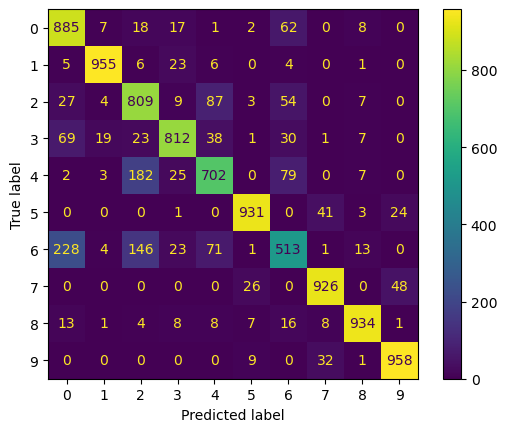

In [22]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

y_pred = model4.predict(test_data_norm)
cm = confusion_matrix(test_labels,y_pred.argmax(axis=1))
cm
d = ConfusionMatrixDisplay(cm)
d.plot()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13136\3828554058.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(title='Confusion Matrix',


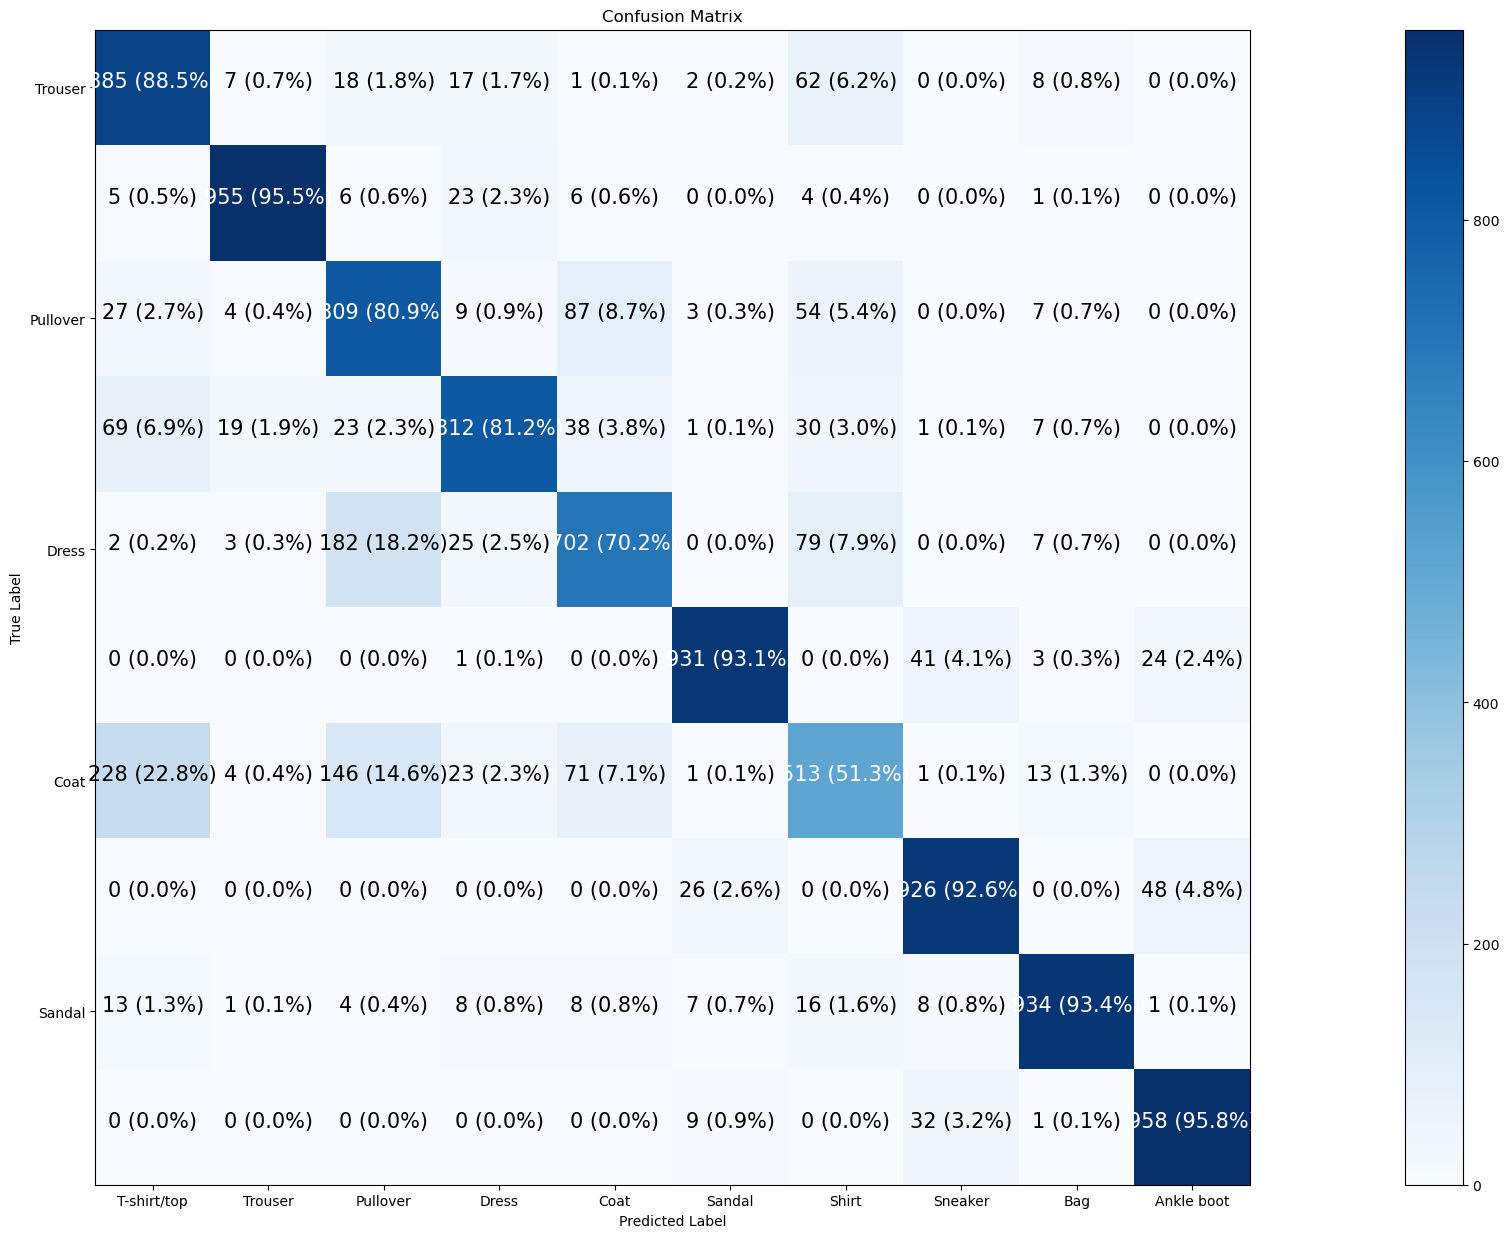

In [25]:
plot_confusion_matrix_custom(test_labels,y_pred.argmax(axis=1),class_names)

* Plot a random image
* Make prediction on the example image
* Label the plot with truth label and predicted label

In [38]:
# plot random image
def draw_random_image(model,train_data,train_labels):
    
    random_idx = np.random.choice(np.arange(0,len(train_data)))
    sample_image = train_data[random_idx]
    sample_image_norm = sample_image/sample_image.max()
    sample_prediction = model4.predict(sample_image_norm.reshape(1,28,28))
    pred_label = class_names[np.argmax(sample_prediction)]
    true_label = class_names[train_labels[random_idx]]
    print(pred_label)
    print(true_label)
    
    plt.imshow(sample_image,cmap=plt.cm.binary)
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(
        pred_label,
        100*tf.reduce_max(sample_prediction),
        true_label
    ),color=color)
    plt.title(class_names[train_labels[random_idx]])
    
    

1/1 [==============================] - 0s 24ms/step
T-shirt/top
Shirt


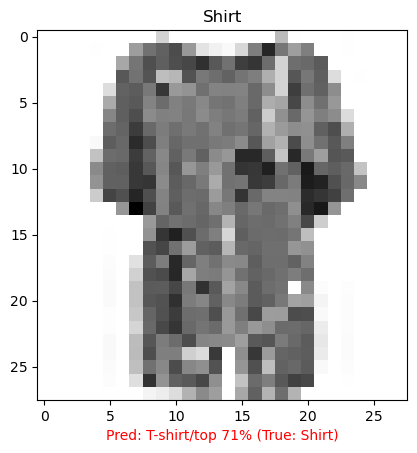

In [44]:
draw_random_image(model4,train_data,train_labels)

# What Patterns is our model learning?

In [45]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [46]:
model4.layers

In [47]:
model4.layers[0]

In [50]:
weights,biases = model4.layers[1].get_weights()
weights,biases

(array([[-1.9261838 , -1.2436197 ,  2.1257138 , ..., -0.05601708,
         -0.06228635,  2.2978928 ],
        [ 3.1829143 ,  1.1831445 , -6.3536043 , ..., -0.02038274,
         -0.05554667, -2.8412647 ],
        [ 1.8687423 ,  1.6563758 , -2.513569  , ...,  0.04934461,
          0.01717917, -1.9265624 ],
        ...,
        [ 0.55024266,  1.0685952 , -1.2442473 , ..., -0.0247862 ,
         -0.02584079, -0.3217659 ],
        [ 0.31202286, -3.4870033 , -0.03162494, ..., -0.03710229,
         -0.00838125, -1.286494  ],
        [ 2.8752227 ,  0.9184723 , -0.1816687 , ...,  0.06352756,
         -0.02464001,  0.47472706]], dtype=float32),
 array([ 1.5965694 ,  2.0485637 ,  0.15339798,  3.4741645 , -0.0254178 ,
         2.3767176 ,  0.9497067 , -0.02613906,  0.04363431,  1.5973089 ],
       dtype=float32))

In [53]:
len(weights),len(biases)

(784, 10)

In [52]:
weights,weights.shape

(array([[-1.9261838 , -1.2436197 ,  2.1257138 , ..., -0.05601708,
         -0.06228635,  2.2978928 ],
        [ 3.1829143 ,  1.1831445 , -6.3536043 , ..., -0.02038274,
         -0.05554667, -2.8412647 ],
        [ 1.8687423 ,  1.6563758 , -2.513569  , ...,  0.04934461,
          0.01717917, -1.9265624 ],
        ...,
        [ 0.55024266,  1.0685952 , -1.2442473 , ..., -0.0247862 ,
         -0.02584079, -0.3217659 ],
        [ 0.31202286, -3.4870033 , -0.03162494, ..., -0.03710229,
         -0.00838125, -1.286494  ],
        [ 2.8752227 ,  0.9184723 , -0.1816687 , ...,  0.06352756,
         -0.02464001,  0.47472706]], dtype=float32),
 (784, 10))

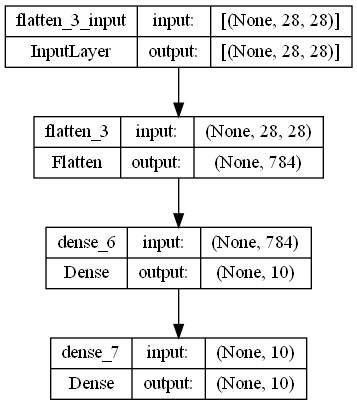

In [55]:
# visualize deep learning model
from tensorflow.keras.utils import plot_model
plot_model(model4,show_shapes=True)